<div class="alert alert-block alert-success">
    <b><center>LINEAR REGRESSION</center></b>
    <b><center>머신러닝에 댸한 기본을 이해하기 위한 코드</center></b>
</div>

# 환경 구성

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [3]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'1.15.0'

# 개념 이해

## Hypothesis
$$ H(x)=Wx+b $$

In [4]:
eduConf = rsp.EduPlotConf(font="NanumGothicCoding", figScale=1)
eduPlot = rsp.EduPlot2D(eduConf)

In [5]:
targets = np.array([ [1, 1], [1.5, 1.8], [2.3, 2.3], [0.5, 1.2] ])

In [6]:
@interact(w=(-2.0, 2.0, 0.01), b=(-3.0, 3.0, 0.01))
def drawHypothesis(w, b):
    eduPlot.addFunction(f"{w}*x+{b}")
    eduPlot.addMarker(targets, "o", color="#FF0000")
    eduPlot.genSpace([0, 3], [0, 3])

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0, step=0.01), FloatSlider(value…

## Cost Function

$$ cost() = \frac { 1 }{ m } \sum { c(H(x),y) } $$
$$ cost() = \frac{1}{m} \sum _{ i=1 }^{ m }{ { (H({ x }^{ (i) }) - { y }^{ (i) }) }^{ 2 } } $$
$$ cost(W,b)=\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (W{ x }^{ (i) }-{ y }^{ (i) }+b) }^{ 2 } } $$

## Optimize Goal
$$ \underset { W,b }{ minimize } \quad cost(W,b) $$

In [7]:
targets = np.array([ [1, 1], [1.5, 1.8], [2.3, 2.3], [0.5, 1.2] ])
data, label = targets[:,0], targets[:,1]
rsp.showMulti(data, label)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [8]:
def cost(data, label, w, b=1):
    return np.average(np.square((w * data + b) - label))

In [9]:
def diff(data, label, w, b=1):
    return np.average(2*data*(w*data - label + b))

In [10]:
plotConf = rsp.EduPlotConf()
plot = rsp.EduPlot2D(plotConf)

In [11]:
W = np.linspace(-3, 3)
loss = [cost(data, label, w, b=1) for w in W]

In [12]:
plot.addXYData(W, loss, name="base")

In [13]:
diff(data, label, 0, b=2)

0.5050000000000001

In [14]:
plot.addFunction(f"{diff(data, label, -0.1, b=1)}*x")

In [15]:
# dif = [diff(data, label, w, b=2) for w in W]
# plot.addXYData(W, dif)

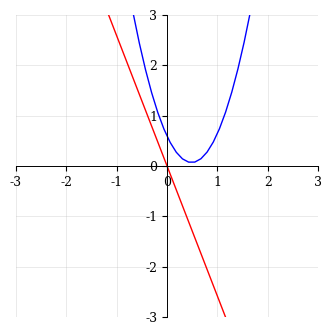

In [16]:
plot.genSpace(3, 3)